# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [2]:
data = pd.read_csv("C:/Users/USER/Dattaram Kolte/CreditRisk.csv")
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0           0           

In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [5]:
data.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0           0             360.0   
1             4583             1508.0         128             360.0   
2             3000                0.0          66             360.0   
3             2583             2358.0         120             360.0   
4             6000                0.0         141             360.0   
5             5417             4196.0         267             360.0   
6             2333             1516.0          95             360.0   
7             3036             2504.0         158             360.0   
8             4006             1526.0         168             360.0   
9            12841            10968.0         349             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0         Urban            1  
4             1.0         Urban            1  
5             1.0         Urban            1  
6             1.0         Urban            1  
7             0.0     Semiurban            0  
8             1.0         Urban            1  
9             1.0     Semiurban            0

In [6]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000         600.00000   
mean       5403.459283        1621.245798  141.166124         342.00000   
std        6109.041673        2926.248369   88.340630          65.12041   
min         150.000000           0.000000    0.000000          12.00000   
25%        2877.500000           0.000000   98.000000         360.00000   
50%        3812.500000        1188.500000  125.000000         360.00000   
75%        5795.000000        2297.250000  164.750000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  Loan_Status  
count      564.000000   614.000000  
mean         0.842199     0.687296  
std          0.364878     0.463973  
min          0.000000     0.000000  
25%          1.000000     0.000000  
50%          1.000000     1.000000  
75%          1.000000     1.000000  
max          1.000000     1.000000

In [7]:
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [8]:
data.groupby(['Education','Loan_Status']).Education.count()

Education     Loan_Status
Graduate      0              140
              1              340
Not Graduate  0               52
              1               82
Name: Education, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

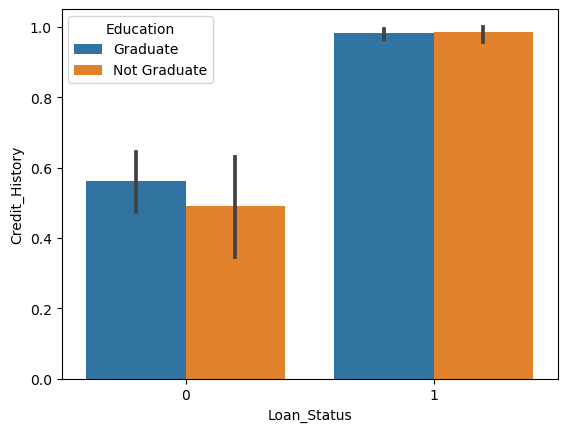

In [9]:
sb.barplot(y = "Credit_History",x = "Loan_Status",hue = "Education",data = data)

### Filling the Null Values

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data = data.drop(data.columns[0],axis=1)
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0           0             360.0             1.0   
1             1508.0         128             360.0             1.0   
2                0.0          66             360.0             1.0   
3             2358.0         120             360.0             1.0   
4                0.0         141             360.0             1.0   

  Property_Area  Loan_Status  
0         Urban            1  
1         Rural            0  
2         Urban            1  
3         Urban            1  
4         Urban            1

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int64  
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 57.7+ KB


In [13]:
#Segregetting the columns into the different category
data_object = data.select_dtypes(include=['object']).columns
data_numeric = data.select_dtypes(exclude=['object']).columns

In [14]:
print(data_object)
print(data_numeric)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')


In [15]:
#Impute
for columns in data_object:
    majority = data[columns].value_counts().iloc[0]
    data.fillna(majority, inplace = True)

In [16]:
for columns in data_numeric:
    majority = data[columns].value_counts().iloc[0]
    data.fillna(majority, inplace = True)

In [17]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Categorical Values

In [18]:
data[data_object].Property_Area

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [20]:
data[data_object].Property_Area.head()

0    Urban
1    Rural
2    Urban
3    Urban
4    Urban
Name: Property_Area, dtype: object

In [23]:
data_dummy = pd.get_dummies(data, columns=data_object)
data_dummy.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0           0             360.0   
1             4583             1508.0         128             360.0   
2             3000                0.0          66             360.0   
3             2583             2358.0         120             360.0   
4             6000                0.0         141             360.0   

   Credit_History  Loan_Status  Gender_489  Gender_Female  Gender_Male  \
0             1.0            1           0              0            1   
1             1.0            0           0              0            1   
2             1.0            1           0              0            1   
3             1.0            1           0              0            1   
4             1.0            1           0              0            1   

   Married_489  ...  Dependents_2  Dependents_3+  Education_Graduate  \
0            0  ...             0              0                   1   
1            0  ...             0              0                   1   
2            0  ...             0              0                   1   
3            0  ...             0              0                   0   
4            0  ...             0              0                   1   

   Education_Not Graduate  Self_Employed_489  Self_Employed_No  \
0                       0                  0                 1   
1                       0                  0                 1   
2                       0                  0                 0   
3                       1                  0                 1   
4                       0                  0                 1   

   Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0                  0                    0                        0   
1                  0                    1                        0   
2                  1                    0                        0   
3                  0                    0                        0   
4                  0                    0                        0   

   Property_Area_Urban  
0                    1  
1                    0  
2                    1  
3                    1  
4                    1  

[5 rows x 25 columns]

### Model Training

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
X = data_dummy.drop('Loan_Status', axis=1)          
y = data_dummy.Loan_Status
# print(X)
# print(y)

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
train_x.shape, test_x.shape

((429, 24), (185, 24))

In [71]:
model = LogisticRegression()
model.fit(train_x, train_y)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
train_y_hat = model.predict(train_x)
test_y_hat = model.predict(test_x)

### Model Evaluation

In [73]:
print('Train set accuracy: ', accuracy_score(train_y, train_y_hat))
print('Test set accuracy: ', accuracy_score(test_y, test_y_hat))

Train set accuracy:  0.7062937062937062
Test set accuracy:  0.6324324324324324


# Support Vector Machine

In [76]:
from sklearn.svm import SVC

### Model Training

In [80]:
model_svm = SVC(kernel='rbf', gamma=0.00001, C=1000)

In [81]:
model_svm.fit(train_x, train_y)

SVC(C=1000, gamma=1e-05)

In [82]:
train_y_hat = model_svm.predict(train_x)
test_y_hat = model_svm.predict(test_x)

In [86]:
print('-'*20, 'Train', '-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       127
           1       0.98      0.99      0.98       302

    accuracy                           0.98       429
   macro avg       0.97      0.97      0.97       429
weighted avg       0.98      0.98      0.98       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.33      0.22      0.26        65
           1       0.64      0.77      0.70       120

    accuracy                           0.57       185
   macro avg       0.49      0.49      0.48       185
weighted avg       0.53      0.57      0.55       185



In [102]:
print(accuracy_score(train_y, train_y_hat))
print(accuracy_score(test_y, test_y_hat))

0.9766899766899767
0.572972972972973


In [104]:
print(confusion_matrix(train_x, train_x_hat))

NameError: name 'train_x_hat' is not defined